**Import libraries**

In [ ]:
import pandas as pd                       
import matplotlib.pyplot as plt     
import seaborn as sns       
import numpy as np
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

**read data**

In [ ]:
mydata = pd.read_csv('/content/heart - heart.csv')  

**Information about the data:**
*   **number of columns and rows** .
*   **some statistics** .
*   **number of entries** . 



In [ ]:
mydata.shape


(303, 14)

In [ ]:
mydata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**number of null values over the data**




In [ ]:
mydata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**check if there is duplicate rows**

In [ ]:
duplicate = mydata[mydata.duplicated(keep = 'last')]
print(duplicate)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
163      2   4     2       1  


**Delete duplicated row**

In [ ]:
mydata=mydata.drop_duplicates()


**correlation among all features**

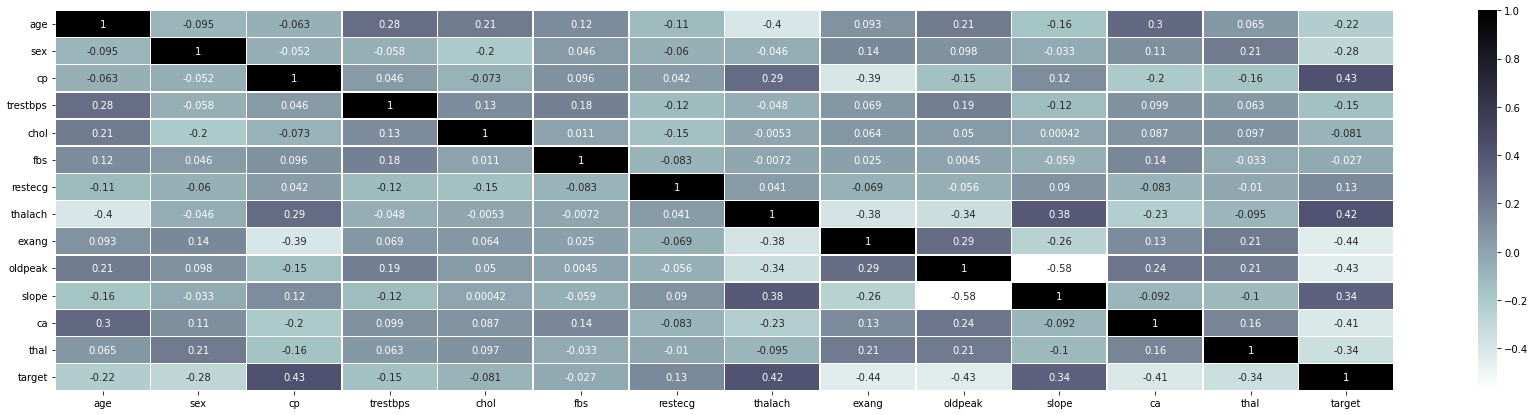

In [ ]:
plt.figure(figsize = (30,7))
sns.heatmap(data=mydata.corr(),annot=True,linewidths=.5,cmap='bone_r')
#plt.tight_layout()


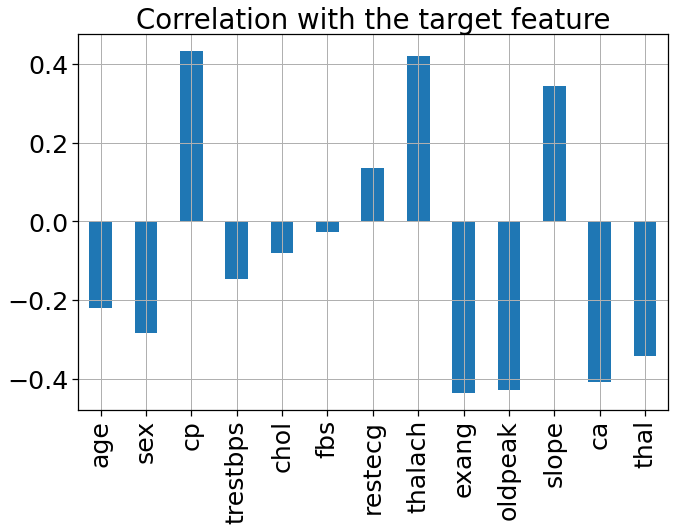

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
mydata.drop('target', axis=1).corrwith(mydata.target).plot(kind='bar', grid=True, figsize=(10, 8),  title="Correlation with the target feature")
plt.tight_layout()
#2

**split data to target 1 and target 0**

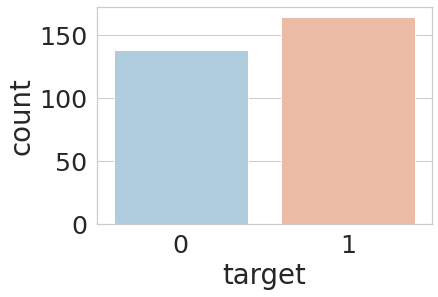

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = mydata, palette = 'RdBu_r')
#5

In [ ]:
target_one=mydata[mydata['target']==1]
target_zero=mydata[mydata['target']==0]

**precentage target 1 (has) and target 0 (not)**

([<matplotlib.patches.Wedge at 0x7f91a4e4ae10>,
 [Text(-0.14830451966640817, 1.0899567741183667, 'has'),
  Text(0.14830451966640754, -1.0899567741183667, 'does_not_have')],
 [Text(-0.08089337436349535, 0.5945218767918362, '54.3%'),
  Text(0.080893374363495, -0.5945218767918363, '45.7%')])

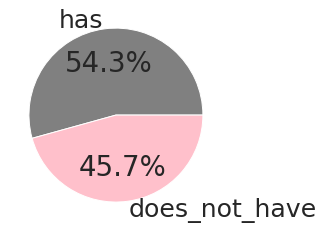

In [ ]:

colors = ['grey','pink']
plt.pie([len(target_one),len(target_zero)],labels=['has','does_not_have'],colors=colors, autopct='%1.1f%%')


**The age distribution of people with and without heart disease**

0    54
dtype: int64

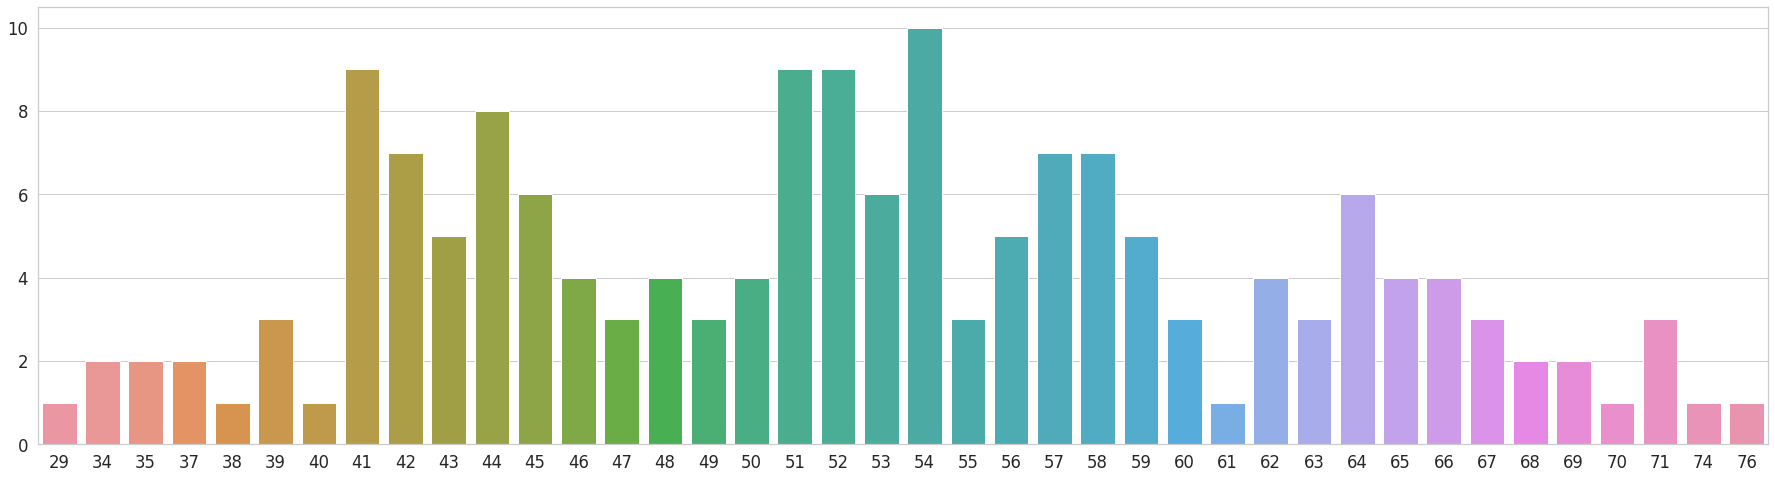

In [ ]:
#with heart disease
plt.figure(figsize=(25,7))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=target_one['age'].value_counts()[:].index,y=target_one['age'].value_counts()[:].values)
plt.tight_layout()
target_one['age'].mode()

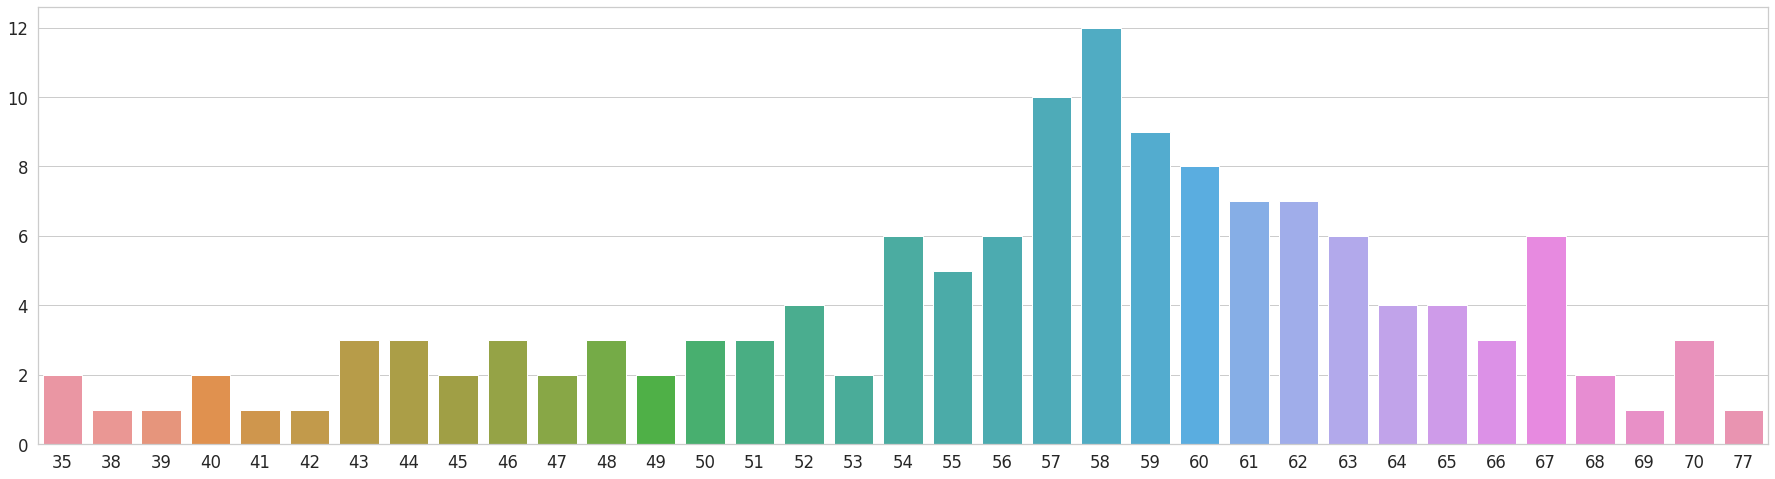

In [ ]:
#without heart disease
plt.figure(figsize=(25,7))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=target_zero.age.value_counts()[:].index,y=target_zero.age.value_counts()[:].values)
plt.tight_layout()



**split age column with target one to:**
*   **Young(29:39 years)**
*   **middle (40:54 years)**
*   **elder( 55: years)**






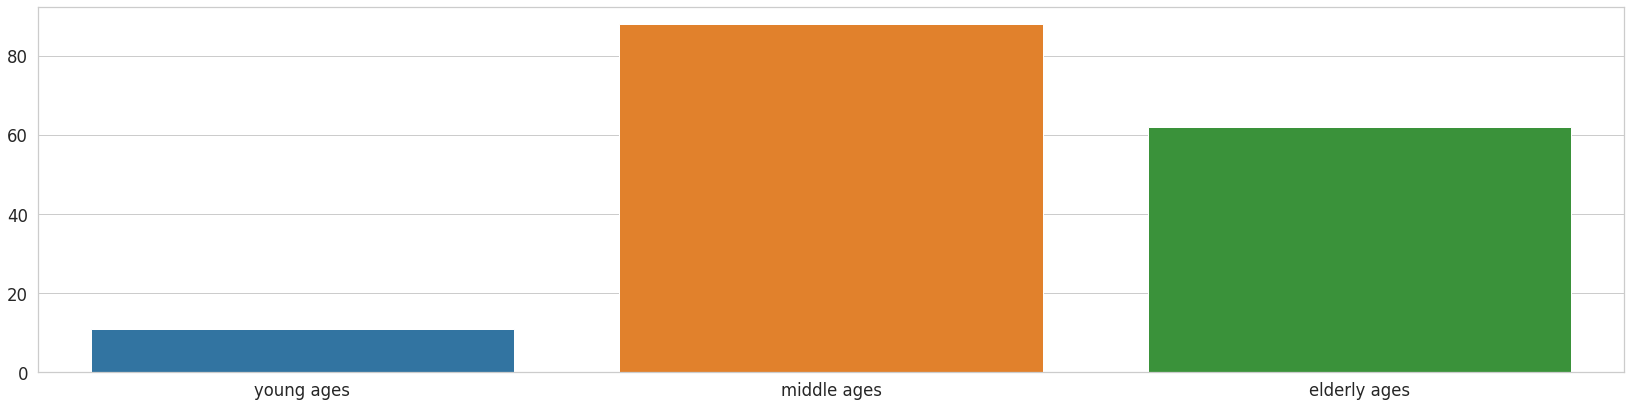

In [ ]:

Young = target_one[(target_one.age>=29)&(target_one.age<40)]
Middle = target_one[(target_one.age>=40)&(target_one.age<55)]
Elder = target_one[(target_one.age>55)]

plt.figure(figsize=(23,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**precentage of (Young ,middle , Elder)pepole with target 1**

([<matplotlib.patches.Wedge at 0x7f91a6e38a90>,
 [Text(1.0747577540284643, 0.23429846383553404, 'young ages'),
  Text(-0.5988028111620177, 0.9227324603288133, 'middle ages'),
  Text(0.3885210363159395, -1.0291022322101866, 'elderly ages')],
 [Text(0.5862315021973441, 0.12779916209210948, '6.8%'),
  Text(-0.3266197151792824, 0.5033086147248073, '54.7%'),
  Text(0.21192056526323969, -0.5613284902964654, '38.5%')])

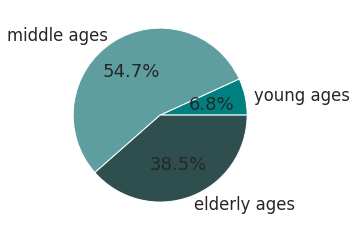

In [ ]:
colors = ['teal','cadetblue','darkslategrey']
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],colors=colors, autopct='%1.1f%%')


**The thalach distribution of people with and without heart disease**

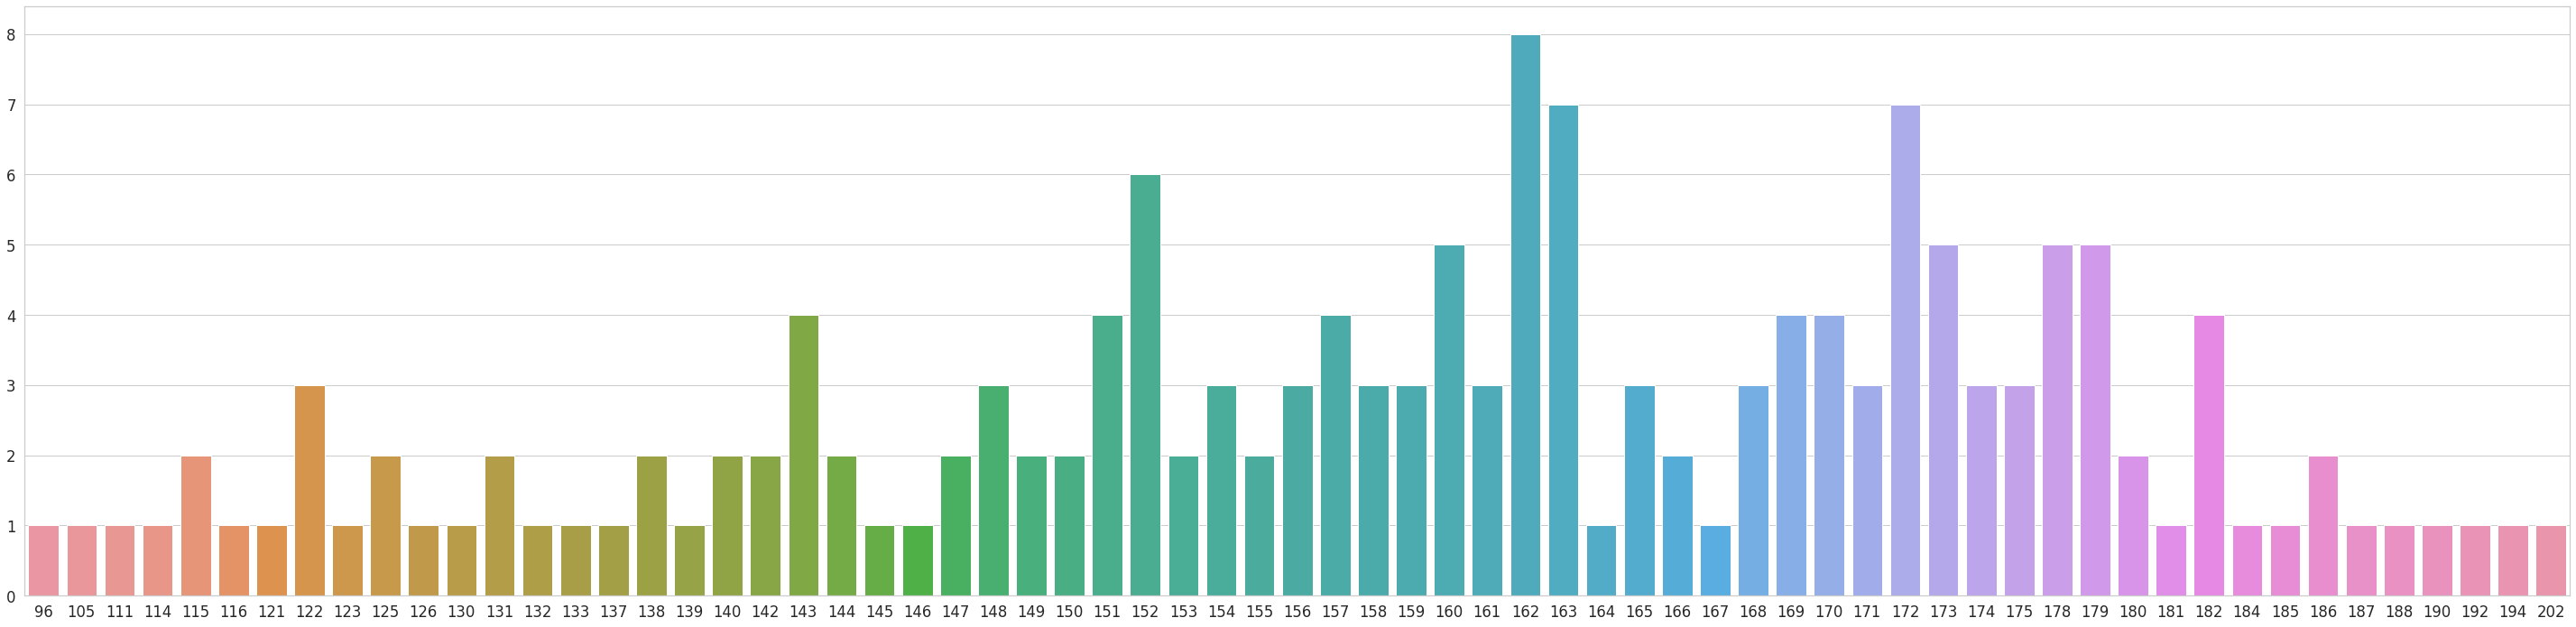

In [ ]:
plt.figure(figsize=(40,10))
sns.set_context('notebook',font_scale = 1.5)
target_one=mydata[mydata['target']==1]
sns.barplot(x=target_one['thalach'].value_counts()[:].index,y=target_one['thalach'].value_counts()[:].values)
plt.tight_layout()

**relation between slope and sex with respect to the target **

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


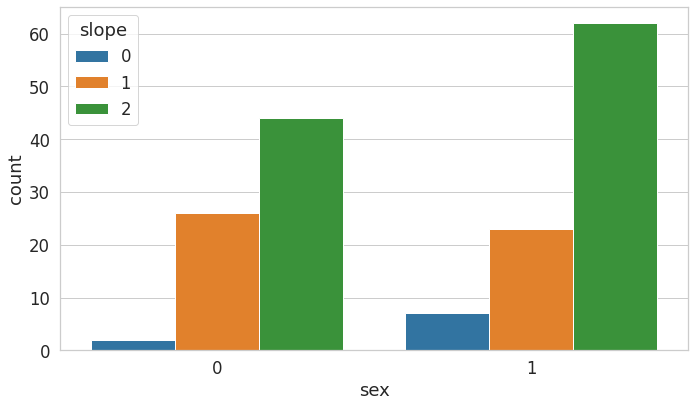

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(target_one['sex'],hue=target_one["slope"])
plt.tight_layout()

**histogram interpretation of disease dataset** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91a4dbf490>,
      dtype=object)

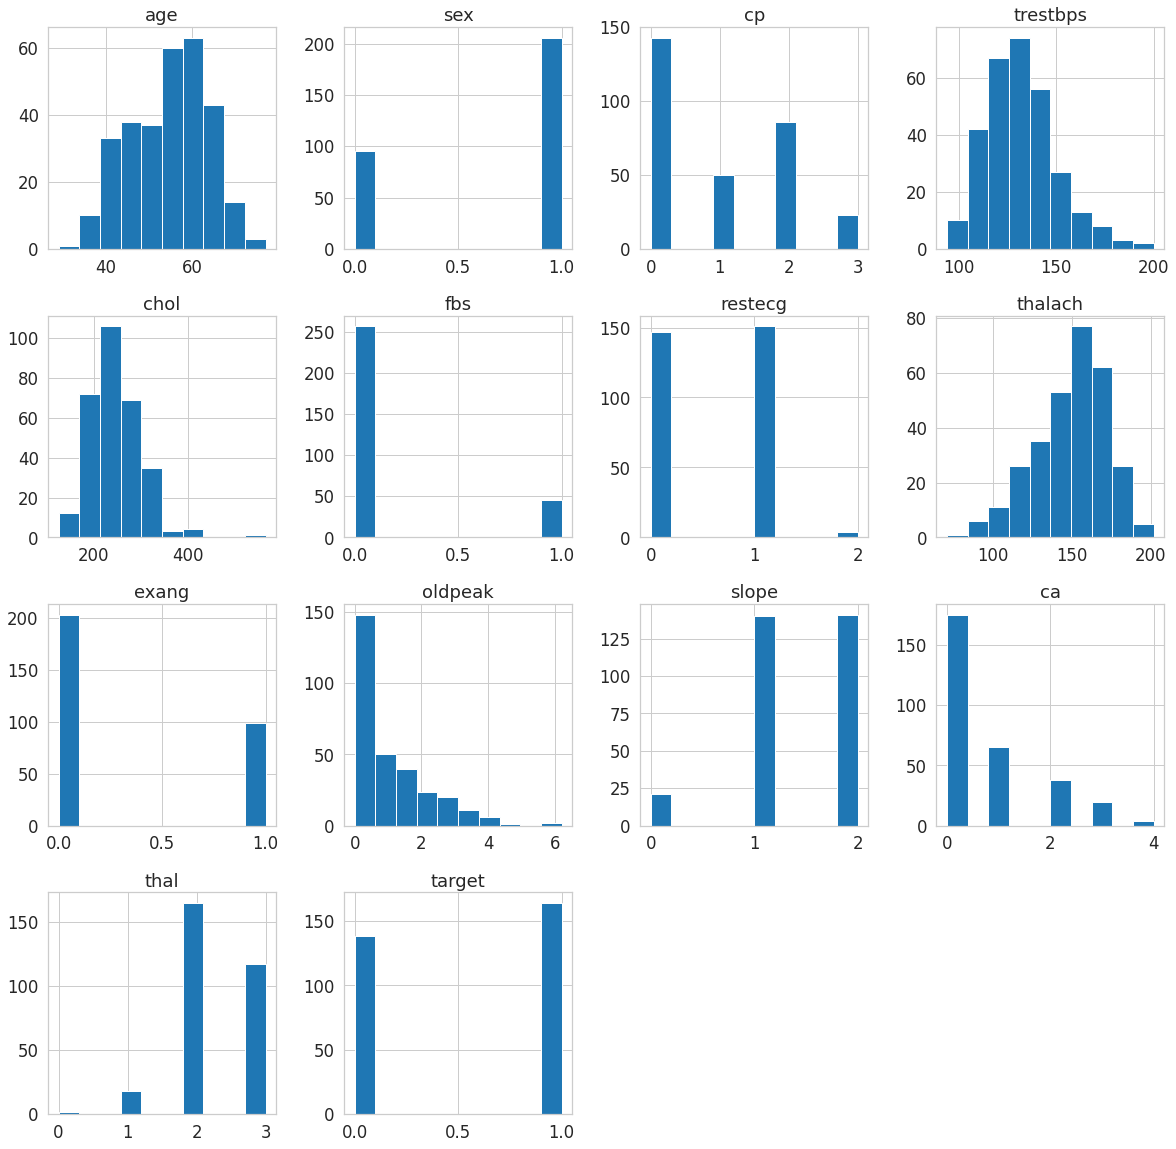

In [ ]:
mydata.hist(figsize = (20,20))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91a4d9e250>,
      dtype=object)

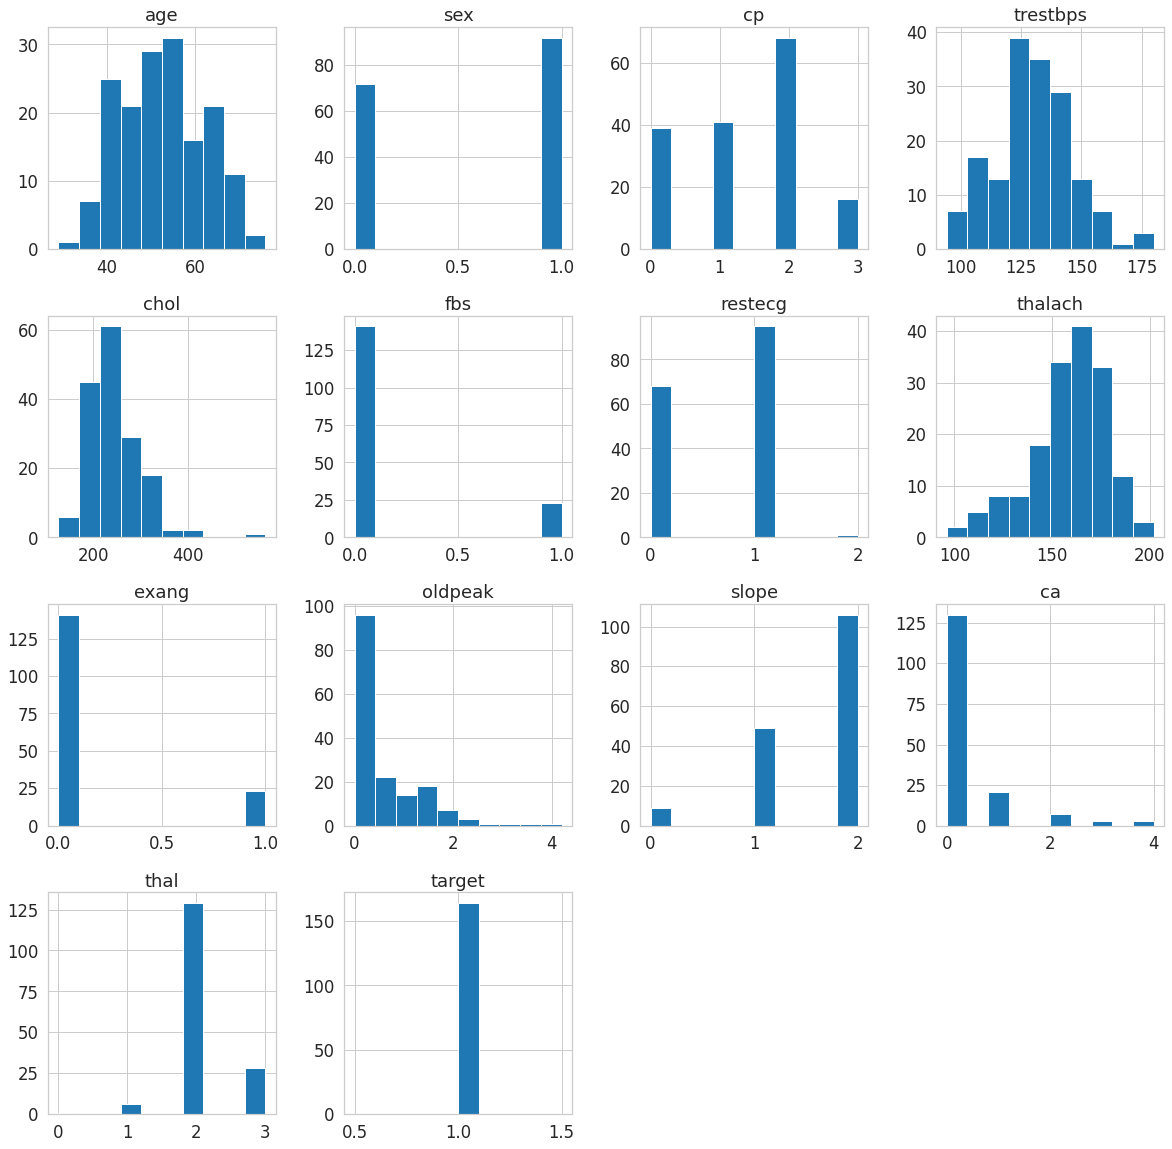

In [ ]:
target_one.hist(figsize = (20,20))

**precentage of male and female over the data**

In [ ]:
print('male precentage  : ',mydata['sex'][mydata['sex']==1].count()/mydata.shape[0]*100,'%')
print('female precentage: ',mydata['sex'][mydata['sex']==0].count()/mydata.shape[0]*100,'%')


male precentage  :  68.21192052980133 %
female precentage:  31.788079470198678 %


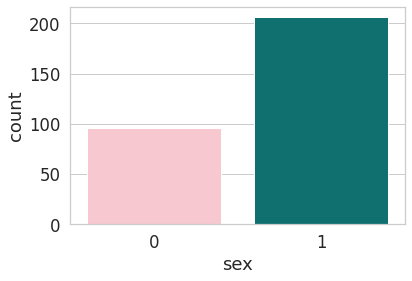

In [ ]:
sns.countplot(x='sex',data=mydata,palette=['pink','teal'])

**precentage of male and female with target one(female precentage less than male precentage)**

In [ ]:
print('male precentage  : ',target_one['sex'][target_one['sex']==1].count()/target_one.shape[0]*100,'%')
print('female precentage: ',target_one['sex'][target_one['sex']==0].count()/target_one.shape[0]*100,'%')

male precentage  :  56.09756097560976 %
female precentage:  43.90243902439025 %


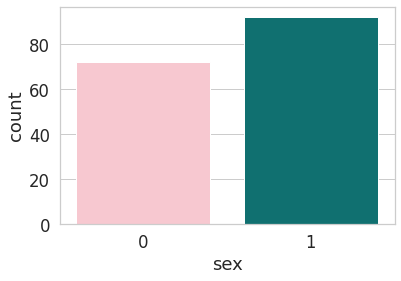

In [ ]:
sns.countplot(x='sex',data=target_one,palette=['pink','teal'])

**split categorical columns using one hot encoding**

In [ ]:
DataSet = pd.get_dummies(mydata, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal']) 

In [ ]:
scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
standardScaler = StandardScaler()
DataSet[scale] = standardScaler.fit_transform(DataSet[scale])

**save target column**

In [ ]:
x= DataSet.drop('target', axis=1).copy()
y= DataSet['target'].copy()

**split data to 80% train and 20% test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=1,shuffle=True)

In [ ]:
sc = ss()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**apply  DecisionTree model**

In [ ]:

clf = DecisionTreeClassifier(random_state=0, max_depth=5)
clf = clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy of  Dession Tree:",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy of  Dession Tree: 72.1311475409836


**apply  SVC model**

In [ ]:

classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Accuracy of  Svc:",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy of  Svc: 80.32786885245902


**apply logistic regression model**

In [ ]:

clf = LogisticRegression()
clf = clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
print("Accuracy of  Dession Tree:",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy of  Dession Tree: 81.9672131147541


**apply KNN model**

In [ ]:

classifier = KNeighborsClassifier (n_neighbors=7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Accuracy of KNN:",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy of KNN: 86.88524590163934


**from our analysis and after applying classification models the bset accuracy we got from KNN model** 